# Tight Binding program to compute the band structure of simple semiconductors.
    
Parameters taken from Vogl, Hjalmarson and Dow,
[A Semiempirical Tight-Binding Theory of the Electronic Structure
of Semiconductors](http://www.sciencedirect.com/science/article/pii/0022369783900641), 
J. Phys. Chem. Sol. 44 (5), pp 365-378 (1983).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh
from collections import namedtuple

import TB

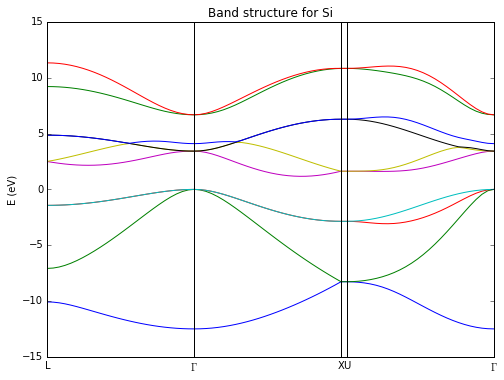

In [2]:
TB.band(TB.Si)

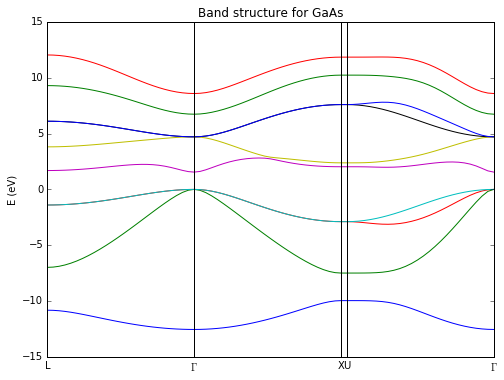

In [3]:
TB.band(TB.GaAs)

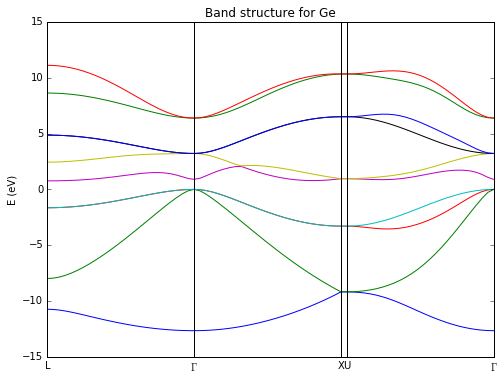

In [4]:
TB.band(TB.Ge)

# Interpolated SiGe band structure
The band structure for Si(1-x)Ge(x) is supposedly well approximated by a linear interpolation of the Si and Ge band structures.

In [15]:
def SiGe_band(x=0.2):
    Si_data = TB.bandpts(TB.Si)
    Ge_data = TB.bandpts(TB.Ge)
    data = (1-x)*Si_data + x*Ge_data
    TB.bandplt("SiGe, %%Ge=%.2f" % x,data)
    return

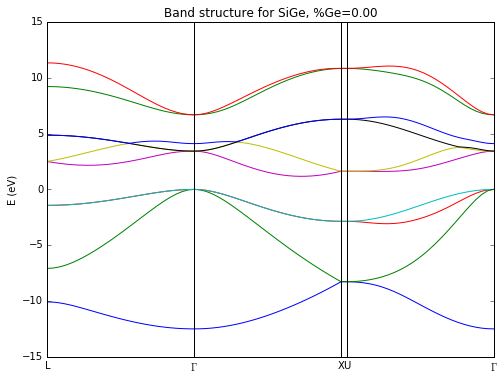

In [16]:
SiGe_band(0)

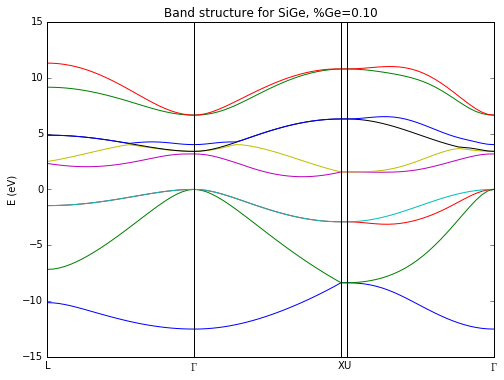

In [9]:
SiGe_band(0.1)

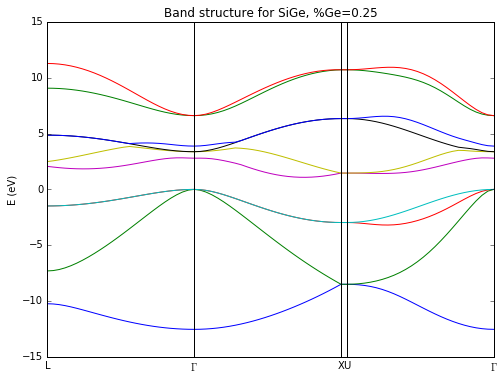

In [10]:
SiGe_band(0.25)

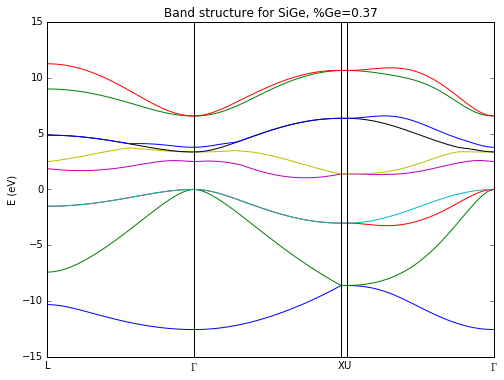

In [11]:
SiGe_band(0.37)

# Plotting misc parts of Brillouin zones
Compare Si and Ge CBs.

(0.0, 76, 0.5, 3.5)

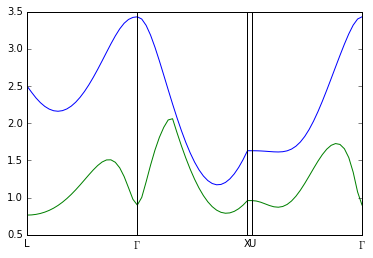

In [12]:
Ge_CB = TB.bandpts(TB.Ge)[:,4]
Si_CB = TB.bandpts(TB.Si)[:,4]

nk = len(Si_CB)
n = (nk-2)//3

plt.plot(Si_CB)
plt.plot(Ge_CB)
TB.band_labels(n)
plt.axis(xmax=3*n+1)

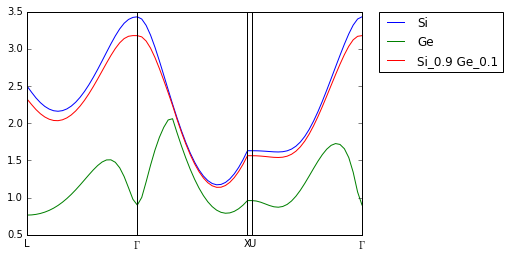

In [13]:
plt.plot(Si_CB,label='Si')
plt.plot(Ge_CB,label='Ge')
plt.plot(0.9*Si_CB + 0.1*Ge_CB,label='Si_0.9 Ge_0.1')
TB.band_labels(n)
plt.axis(xmax=3*n+1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
min_Si = min(Si_CB)
min_Ge = min(Ge_CB)
print min_Si, min_Ge
# min_Si - min_Ge = 0.12
Si_CB_shifted = Si_CB - min_Si + min_Ge + 0.12

1.17218123643 0.764866886075
